# Dimensionality reduction

In general a multi-variate regression model (not necessarily linear) could be expressed as looking for a functional dependence 
$$
y=f(x)
$$
between an output variable $y$ and the multi-dimensional vector of input variables (features, regressors) $x=(x_1,x_2,x_3,....,x_n)$.

When the dimensionality $n$ of the feature space (number of regressors) is too high with respect to the number of observations, it may cause multiple issues:

- complexity: the model involving multiple regressors becomes difficult to fit and interpret;

- multicollinearity: a large set of regressors could encounter substantial correlations, leading to multicollinearity of regressors and high variance in their estimates, making coefficients hard to interpret/rely on;

- overfitting: as multiple regressors might contain a lot of relevant but also irrelevant information, the model could pick it up, becoming too specifically adjusted to the training set, which would reduce its generalizeability (performance over the validation/test set);

Reducing complexity of the model (number of features or their dimensionality) is usually recommended in such cases. The most streighforward way of doing so is through feature selection. 

Feature selection aims to reduce dimensionality of $x$ by removing some of its components $x_j$ which turn out to be the least relevant for the model, i.e. have the lowest positive or even negative impact on the model performance over the external validation set. This way feature selection provides a mapping of vectors $x$ into a shorter vector of its subcomponents, e.g.
$$
(x_1,x_2,x_3,x_4,x_5)\to (x_1,x_3,x_5).
$$

But feature selection is often too rigid - we have to make our choices of keeping or getting rid of each variable entirely, though it might be the case that each regressor by itself still contains certain valuable information, but all together the feature space is redundant. As an alternative one can think of expressing the useful information contained in a large inital amount of regressors through some smaller amount of latent variables (different from the initial regressors) able to explain all or almost all the relevant information. This is called dimensionality reduction.

In general, dimensionality reduction looks for an arbitrary mapping of the feature space (possibly transforming the features not just removing some) into a new feature space of a smaller dimension:
$$
x=(x_1,x_2,x_3....,x_n)\to x'=(x_1',x_2',x_3',....,x_m),
$$
so that a simpler model $y=f(x')$ could be learned instead.

E.g. a mapping
$$
(x_1,x_2,x_3,x_4,x_5)\to x'=(x_1+x_2+x_3+x_4+x_5,x_1 x_2 x_3 x_4 x_5)
$$
could serve as an example of reducing the dimensionality of the feature space from $5$ to $2$.

Such reduction often turnes out to be pretty useful as learning a model over a smaller set of features could be easier and such models might be more resilient to overfitting and easier to interpret. Often dimensionality could be substantially reduced without reducing the capacity of the model to fit the output variable much. This is becasue the Pareto rule is perfectly applicable in this scenario - 80% (or even 90, 95, 99%) of the useful information contained in the original regressors could be effectively packed into a much smaller amount of the new regressors (under a suitable transformation), often being 20% (or even 10, 5, 1%) of the original size. This way 80% (or even 90, 95, 99%) of the efficieny could be acheived with 20% (or even 10, 5, 1%) of the effort (complexity).

# Principle component analysis

A most common linear approach to dimentionality reduction is the principal component analysis. An idea is that given $N$ observations for the $n$ regressors $x_j$

$$
X=\{x_i^j, i=1..n, j=1..N\}
$$

we try to come up with a linear transformation

$$
U=X V,
$$

where $V$ is $nxp$-dimensional transformation matrix and $U$ is a $N x p$ matrix of new factors $u_1,u_2,...,u_p$ (columns of $U$), such that they explain as much of initial information contained in $X$ as possible for the $p$ latent variables - linear combinations of the original ones.

## Technique

Before applying PCA variables $x_i$ are usually centered ($E[x_i]=0$) and sometimes also normalized ($var[x_i]=1$).

Selecting first principle component: look for the column unit basis $N x 1$ vector of weights/loadings $v_1$, such that resulting variable $u_1=X v_1$ has maximal possible variance $var[u_1]$ (captures as much information/distinctions from the complete feature space $X$):
$$
v_1=argmax_{v_1: v_1^T v_1=1}var[u_1] =argmax_{v_1: v_1^T v_1=1}u_1^T u_1=argmax_{v_1: v_1^T v_1=1}v_1^T X^T X v_1.
$$

Then after first basis vector $v_1$ and principle component $u_1$ are selected, the second basis vector $v_2$ is selected following the same principle, but with an additional constrain of being orthogonal to $v_1$. 

Similarly each following $i$-th vector $v_i$ is being defined as
$$
v_i=argmax_{v_i: v_i^T v_i=1, v_i^T v_j=0, j<i}v_i^T X^T X v_i.
$$

The problem is easy to solve knowing the eigenvectors of $X^T X$, i.e. such unit vectors $v_i$ ($v_i^T v_i=1$) that

$$
\lambda_i v_i=X^T X v_i
$$

or in the matrix form

$$
diag(\lambda)V=X^T X V
$$

where $\lambda_i$ are the corresponding eigenvalues (mutually distinctive). First of all its easy to see that such vectors $v_i$ are always mutually orthogonal, as

$$
v_j^T v_i= v_j^T X^T X v_i/\lambda_i =(X^T X w_j)^T v_i/\lambda_i=v_j^T v_i \lambda_j/\lambda_i.
$$

This is why $V^T V=I_n$.

Now if we know $n$ unit eigenvectors with distinct eigenvalues such that $\lambda_1>\lambda_2> ...>\lambda_n>0$, they produce an orthogonal basis in the $n$-dimensional space and for any unit vector $w=e_1 v_1+e_2 v_2+... +e_n v_n$ we can see that

$$
w^T X^T X w=\lambda_1 e_1^2+\lambda_2 e_2^2+...+\lambda_n e_n^2,
$$

which is maximized for $e_1=1, e_2=e_3=...e_n=0$ (as $\sum_i e_i^2=1$), i.e. $w=v_1$. 

Similarly the second, third, etc loading vectors could be found as $v_2,v_3,...$ correspondingly.

Also the solution follows from the singular value decomposition of the matrix $X$:

$$
X=W \Sigma V^T,
$$

where $W$ is a $N x n$ matrix of mutually orthogonal unit columns, $V$ is a $n x n$ matrix of mutually orthogonal unit columns and $\Sigma$ is an $n x n$- diagonal matrix, i.e.

$$
W^T W=V^T V=I_n
$$

Then

$$
X^T X=V\Sigma W^T W \Sigma V^T=V\Sigma^2 V^T
$$

and its easy to see that $V$ is the matrix of eigenvectors and $\Sigma$ is the diagonal matrix of square roots of eigenvalues. Then 

$$
U=XV=W\Sigma V^T V=W\Sigma.
$$

## PCA as a dimensionality reduction tool

Now once matrixes $V, U, \Sigma$ are defined as well as the eigenvalues $\lambda_j$ (being the squares of the diagonal elements of $\Sigma$), how do we use that for dimensionality reduction? 

Matrix $V$ performs a transformation of the regressors $x_i$ to the new orthogonal variables $u_i$ being the columns of $U$. And 
$$
Var[u_i]=\lambda_i
$$

This is interpreted as each variable $u_i$ containing the fraction $\lambda_i/\sum\limits_j \lambda_j$ of the entire information (variation) contained in all the regressors. And the choice of regressors $u_i$ is such that $\lambda_1,\lambda_2,...$ are sequentially maximized. So if one wants to select as few latent variables as possible in order to cover a given franction $\alpha$ (often $95\%$) of information (variation) from it is enough to select first $k$ principle components $u_1,u_2,...u_k$, so that 

$$
\frac{\sum\limits_{i=1}^k\lambda_i}{\sum\limits_{i=1}^n\lambda_i}\geq \alpha.
$$

## PCA over the features space for dimensionality reduction in the linear regression

The leading principle components contain most of the information from the entire original feature space, and might be suitable to represent the feature space reducing its dimensionality. This however does not guarantee (although usually provides a good chance) that those leading components are indeed the ones most relevant for modeling the output variables, so reducing dimensionality of the regression model by selecting the leading principle components does not always lead to the best outcome. 

In this case, using regular feature selection (e.g. backward step-wise or forward step-wise) could be the best. PCA however will help by ensuring that the features are not interrelated and can be effectively excluded or included one-by-one. This way feature selection after PCA is always more efficient than the feature selection over the original non-transformed feature space. 

This also makes it more reasible (although still not entirely) to rely on the "naive" feature selection based on p-values. While p-values still represent an intrinsic property of the training set, and this way can not guarantee generalizeability, since the standardized principle components are non-correlated/othogonal, a low p-value is a good indicator of the regressor's utility as long as the size/choice of the training data is sufficient to exclude random coincidences.

The most significant downside of using PCA for feature selection is that the remaining selected principle components could be pretty hard to interpret as they often look like arbitrary linear combinations of multiple features.




In [3]:
#import modules we need to use for this session
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
#from scipy.stats import t
# PCA module
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

### Example 1: Toy example to understand PCA

#### (1) create some data and plot 

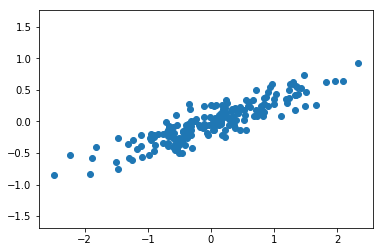

In [4]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

#### (2) principal components
(in this particular example ~97.6% of the variance is preserved if we project down to the leading principal component)

In [5]:
print("total variance:{}".format(np.sum(np.var(X,0))))
pca = PCA(2)
pca.fit(X)
print("variance explained via the first and second components:{}\n".format(pca.explained_variance_))
print("principal components:\n{}".format(pca.components_))

total variance:0.777104349414
variance explained via the first and second components:[ 0.7625315  0.0184779]

principal components:
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


#### (3) let's plot the two principal components

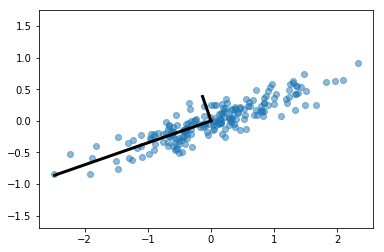

In [6]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

#### (4)let's project the data onto the first principal component

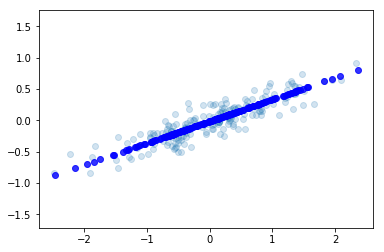

In [7]:
clf = PCA(0.95) # keep 95% of variance. This is another way to define the hyperparameters.
X_trans = clf.fit_transform(X)
X_new = clf.inverse_transform(X_trans) # transformed data
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

#### (5) let's project the data onto the second principal component 

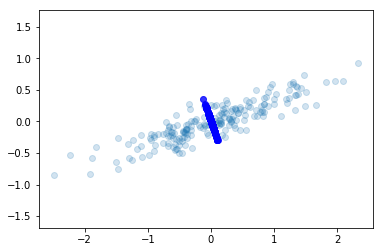

In [8]:
e2=pca.components_[1,:] # this is the 2nd eigenvector
X_new2=(np.dot(X,e2)*e2.reshape((2,1))).T  # this is the data projected onto the 2nd eigenvector
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new2[:, 0], X_new2[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

## Example 2. Classic example (flower characteristics) for dimensionality reduction and classification of the data using PCA 

Iris dataset:
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target
data_i=pd.DataFrame(np.concatenate((Y.reshape(len(Y),1),X),axis=1))
data_i.columns=["Species","Sepal_lenth","Sepal_width","Petal_length","Petal_width"]
data_i.head()

,Species,Sepal_lenth,Sepal_width,Petal_length,Petal_width
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg",width=100,height=100>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg",width=100,height=100>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg",width=100,height=100>


#### Now what if we want to visulize the data?

In [10]:
#Covariance between X.
pd.DataFrame(X).corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


[ 0.92461621  0.05301557  0.01718514  0.00518309]


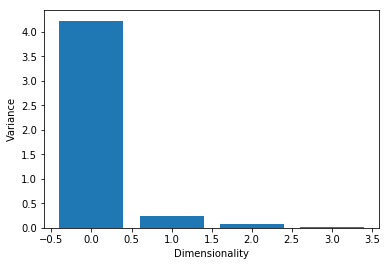

In [11]:
n=4 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

### A. Reduce the dimensionality from 4 to 2 and plot the new feature space

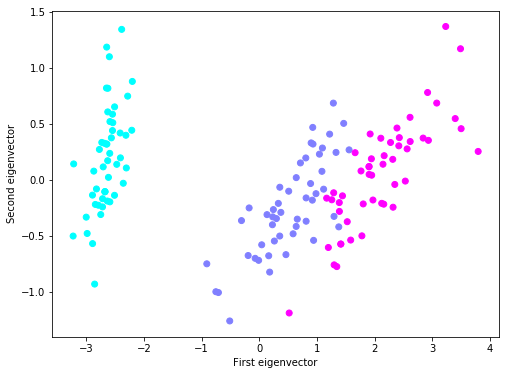

In [12]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=Y, cmap=plt.cm.cool)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()

### Reduce the dimensionality from 4 to 3 and plot it. 

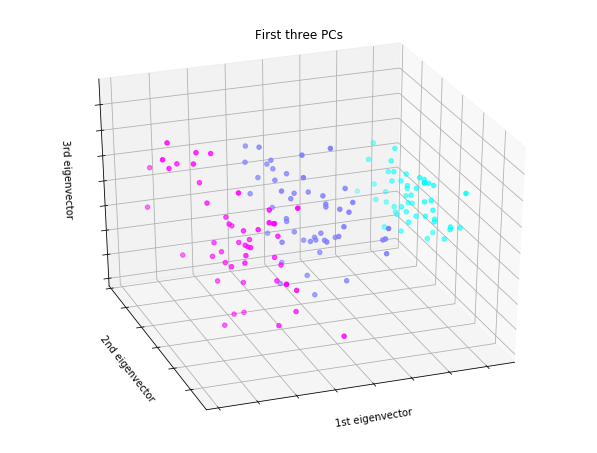

In [13]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Xproj[:, 0], Xproj[:, 1], Xproj[:, 2], c=Y,
           cmap=plt.cm.cool)
ax.set_title("First three PCs")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Example 3: Artificial data (Using PCA as feature selection tool)

In [29]:
data=pd.read_csv("/Users/sddz0/ADS/session6/data/data/data_q1.csv")

In [30]:
data.head(3)

,y,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,3.035437,-18.227424,30.521149,-37.494755,31.108940,-8.917930,13.177162,10.153335,17.521327,14.695400,...,11.332401,-3.530624,14.702212,14.099834,4.037464,12.604090,4.788002,9.592441,7.887213,9.061646
1,1.479243,31.210052,8.273238,17.545475,8.013616,-3.163515,12.632948,10.384905,7.278064,11.506060,...,5.867968,6.762153,11.128908,6.466586,10.245606,10.736484,5.349025,21.841173,-3.204046,19.017705
2,-1.193325,-2.427634,1.698858,-1.980364,-9.902694,9.215057,9.984092,7.627307,7.701929,15.254064,...,15.241884,4.876780,13.953317,11.608533,7.515592,3.413471,12.893463,1.633385,21.345764,7.264307


In [31]:
x=data.iloc[:,1:]
y=np.asarray(data.y)

In [32]:
#Multivariable regression. y~X (No intercept).

#(1) sklearn
from sklearn.linear_model import LinearRegression
ols=LinearRegression(fit_intercept=False)
ols.fit(x,y)
print ols.coef_

[  5.21154801e+00  -7.71586608e+00  -6.41754995e+00   5.19593674e+00
   7.33642207e+00   7.36951614e-03  -6.98303604e-02  -1.44688377e-01
   3.00169434e-02  -4.12361635e-02  -1.18981035e-02   6.45369557e-02
  -6.78464950e-02  -1.51716838e-01   3.43346746e-02   3.36169411e-02
   4.05397263e-02   3.33329948e-02  -1.12002841e-01   4.07332717e-03
  -1.32373703e-02  -4.22958382e-02   3.26439504e-03  -1.65213589e-02
   4.23871855e-02]


In [33]:
#(2) statsmodels for the same y~x. 
import statsmodels.api as sm
res=sm.OLS(y,x).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     4.857
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           9.40e-05
Time:                        16:10:30   Log-Likelihood:                -56.791
No. Observations:                  50   AIC:                             163.6
Df Residuals:                      25   BIC:                             211.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              5.2115      2.704      1.927      0.0

####  The R-squared looks very good?? (Before we go ahead, let's take a quick look at feature selection)

In [35]:
### feature selection by p-values.
res=sm.OLS(y,x.iloc[:,[7,13,18]]).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.1903
Date:                Tue, 17 Oct 2017   Prob (F-statistic):              0.902
Time:                        16:10:44   Log-Likelihood:                -100.68
No. Observations:                  50   AIC:                             207.4
Df Residuals:                      47   BIC:                             213.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
7             -0.0041      0.048     -0.084      0.9

### Overfitting problem

In [36]:
# Using cross validation.
R_IS=[]
R_OS=[]

# Why we need this? let's set n=1 and run several times to see.
n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.912584281644
OS R-squared for 1000 times is -0.891428643728


In [67]:
# Using cross validation after feature selection.
R_IS=[]
R_OS=[]
n=1000
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(x.iloc[:,[7,13,18]]), y, test_size=0.33)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 1000 times is 0.0106808498588
OS R-squared for 1000 times is -0.274896195069


### PCA

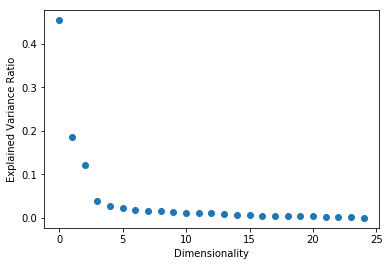

In [38]:
n=25 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(x)
eigenvalues = pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [39]:
#Correlation between variabls in Xproj after transformation.
# pd.DataFrame(Xproj).corr()

In [40]:
import statsmodels.api as sm
res=sm.OLS(y,pd.DataFrame(Xproj)).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     6.519
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           6.58e-06
Time:                        16:10:56   Log-Likelihood:                -50.548
No. Observations:                  50   AIC:                             151.1
Df Residuals:                      25   BIC:                             198.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0200      0.004      5.214      0.0

In [51]:
# What about the feature selection this time?
import statsmodels.api as sm
res=sm.OLS(y,pd.DataFrame(Xproj).iloc[:,[0,1,3]]).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     16.65
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           1.66e-07
Time:                        16:11:31   Log-Likelihood:                -82.885
No. Observations:                  50   AIC:                             171.8
Df Residuals:                      47   BIC:                             177.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0200      0.005      3.744      0.0

In [42]:
# Using cross validation.Looks much better compared to first one if you remember.
def AdjR2(flag,n=10):
  R_IS=[]
  R_OS=[]
  for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Xproj[:,flag], y, test_size=0.4)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
  R2_IS=np.mean(R_IS)  
  R2_OS=np.mean(R_OS)
  return R2_IS, R2_OS, res  

In [43]:
[R2_IS, R2_OS, res]=AdjR2([0, 1, 3],n=1000);
print("IS R-squared for {} times is {}".format(1000,R2_IS))
print("OS R-squared for {} times is {}".format(1000,R2_OS))

IS R-squared for 1000 times is 0.50566157912
OS R-squared for 1000 times is 0.361245717582


In [44]:
# Find the best feature selection (forward step-wise) that maximizes the out-of-sample adjusted R2
def FindBestI():
    flag = np.zeros(n)    # initially exclude all regressors: 1-include, 0-exclude
    r2max = 0             # for storing and compare with best R^2
    while True:
        flag_mat = np.maximum(np.eye(n),flag) #create the matrix with rows representing the cases of adding each new feature
        # see if R2 increases if we add one more feature
        r2 = np.apply_along_axis(AdjR2,1,flag_mat==1)[:,0]  # 1: row-wise operation producing the validation R2 for each row (combination of features)
        temp = r2.max() #take the best R2
        if temp > r2max:
            r2max = temp
            flag = flag_mat[r2.argmax()]  # select the feature set that improved R2
        else:
            break                         # if there's nothing to add, break the loop
    return flag

flag = FindBestI()             # store the best choice of feature selection
R2_IS,R2_OS,lm_best = AdjR2(flag==1)  # then run the regression based on such selection
print("IS R-squared after feature selection is {}".format(R2_IS))
print("OS R-squared after feature selection is {}".format(R2_OS))
flag

IS R-squared after feature selection is 0.878111202858
OS R-squared after feature selection is 0.486511930039


array([ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.])

### Real-world example. House price prediction

Before we tried to use some parameters of the house (size) to predict its price. However notice that location matters as well. Below we upload a sample (approximately 30% of the total) of more than 2000 individual house sales all around NYC in 2012. Each record together with the parameters of the house also contains important characteristics of the location (zip code) - average income of its residents (accodring to US census), as well as the relative structure of 311 complaints happening in the area.

In [45]:
data4=pd.read_csv("data/example4.csv").iloc[:,2:]
data4.loc[:,["zip_code","sale_price","gross_sq_feet","mean"]].head()

IOError: File data/example4.csv does not exist

In [46]:
data4.head()

NameError: name 'data4' is not defined

In [29]:
data4.columns[0:23]

Index([u'borough', u'neighborhood', u'building_class_category',
       u'tax_class_present', u'block', u'lot', u'easement',
       u'building_class_present', u'address', u'apartment_number', u'zip_code',
       u'residential_units', u'commmercial_units', u'land_sq_feet',
       u'gross_sq_feet', u'year_built', u'build_class_time_sale',
       u'sale_price', u'sale_date', u'serialid', u'year', u'mean', u'median'],
      dtype='object')

### OLS 

In [30]:
# Run a linear regression: "sale_price"~"gross_sq_feet"+"land_sq_feet"+"year_built"
res=sm.OLS(data4.sale_price,sm.add_constant(data4.loc[:,["gross_sq_feet","land_sq_feet","year_built"]]),missing="drop").fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     494.0
Date:                Tue, 17 Oct 2017   Prob (F-statistic):          2.48e-249
Time:                        00:00:03   Log-Likelihood:                -36444.
No. Observations:                2375   AIC:                         7.290e+04
Df Residuals:                    2371   BIC:                         7.292e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          1.552e+07   1.63e+06      9.499

In [31]:
# Add first parameter of the location - average income ("mean")
res=sm.OLS(data4.sale_price,sm.add_constant(data4.loc[:,["gross_sq_feet","land_sq_feet","year_built","mean"]]),missing="drop").fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     603.6
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:00:03   Log-Likelihood:                -36186.
No. Observations:                2375   AIC:                         7.238e+04
Df Residuals:                    2370   BIC:                         7.241e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          2.108e+07   1.48e+06     14.200

In [32]:
#If using sklearn.
lm=LinearRegression()
lm.fit(data4.loc[:,["gross_sq_feet","land_sq_feet","year_built","mean"]],data4.sale_price)
lm.coef_

array([   882.77498691,    -72.84491796, -12286.02657014,     27.45810469])

In [33]:
# Using cross validation to show average R-squared
R_IS=[]
R_OS=[]
n=100
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data4.loc[:,["gross_sq_feet","land_sq_feet","year_built","mean"]],data4.sale_price,test_size=0.3)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 100 times is 0.470328940591
OS R-squared for 100 times is 0.327447674361


### Add all 311 data

#### 311 service requests data.
https://en.wikipedia.org/wiki/3-1-1

3-1-1 is a special telephone number supported in many communities in Canada and the United States. The number provides access to non-emergency municipal services. The number format follows the N11 code for a group of short, special-purpose local numbers as designated in the North American Numbering Plan.
The number 3-1-1 is intended in part to divert routine inquiries and non-urgent community concerns from the 9-1-1 number which is reserved for emergency service. A promotional website for 3-1-1 in Akron described the distinction as follows: "Burning building? Call 9-1-1. Burning Question? Call 3-1-1."

In [34]:
data311 = pd.read_csv( 'data/aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [35]:
import numbers
zips={}
zipsinv={}
zipnum=0
complains={}
compinv={}
compnum=0
X=np.zeros(shape=(1000,200))
Z=[0]*1000
for i in data311.index:
    z=data311.Zip[i];
    if not isinstance(z, numbers.Number):
      if z.isdigit():
        if (int(z)>10000)& (int(z)<20000):
           if not (z in zips.keys()):
              zips[z]=zipnum
              zipsinv[zipnum]=z
              zipnum+=1
           comp=data311.Complain[i] 
           if not (comp in complains.keys()):
              complains[comp]=compnum
              compinv[compnum]=comp
              compnum+=1
           X[zips[z]][complains[comp]]=data311.Count[i]
           Z[zips[z]]=int(z)
X=X[0:zipnum,0:compnum]
Z=np.array(Z[0:zipnum])

In [36]:
for z in range(0,zipnum):
    X[z,:]=X[z,:]/sum(X[z,:])

In [37]:
# create borough labels 
manhattanInd=(Z>10000)&(Z<10300)&(Z!=10026)&(Z!=10027)&(Z!=10029)&(Z!=10030)&(Z!=10037)&(Z!=10038) #Manhattan
statenInd=(Z>=10300)&(Z<10400) #Staten Island
brooklynInd=(Z>=11000)&(Z<11300) #Brooklyn
queensInd=(Z>=11300)&(Z<11500) #Queens
bronxInd=(Z>=10400)&(Z<10500) #Bronx
D=Z*0 
D[manhattanInd]=1
D[statenInd]=2
D[brooklynInd]=3
D[queensInd]=4
D[bronxInd]=5

In [38]:
X=X[D>0,:]
Z=Z[D>0]
D=D[D>0]

In [39]:
X.shape

(210, 162)

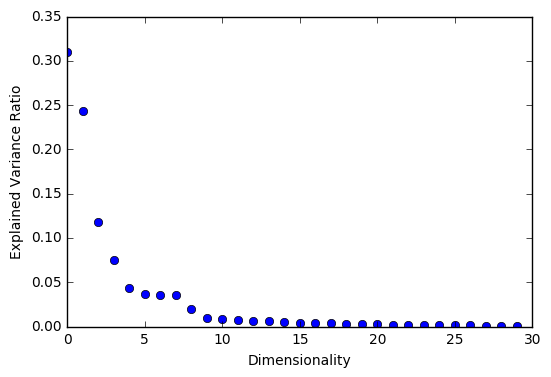

In [40]:
# Plot the biggest 30 eigenvalues.
n=30
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(pd.DataFrame(X))
eigenvalues = pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

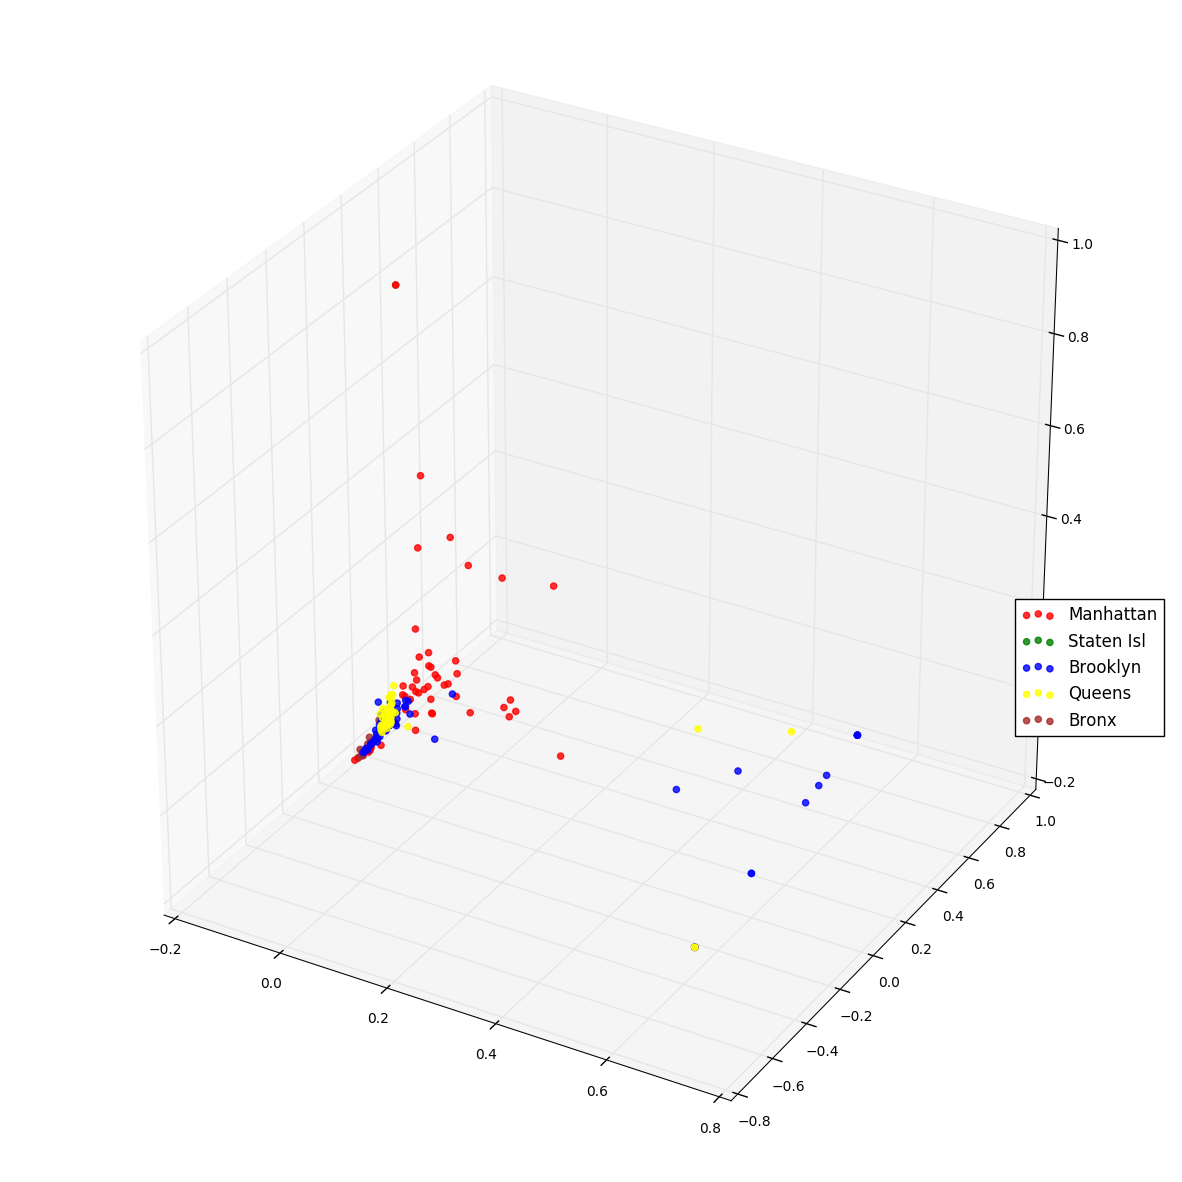

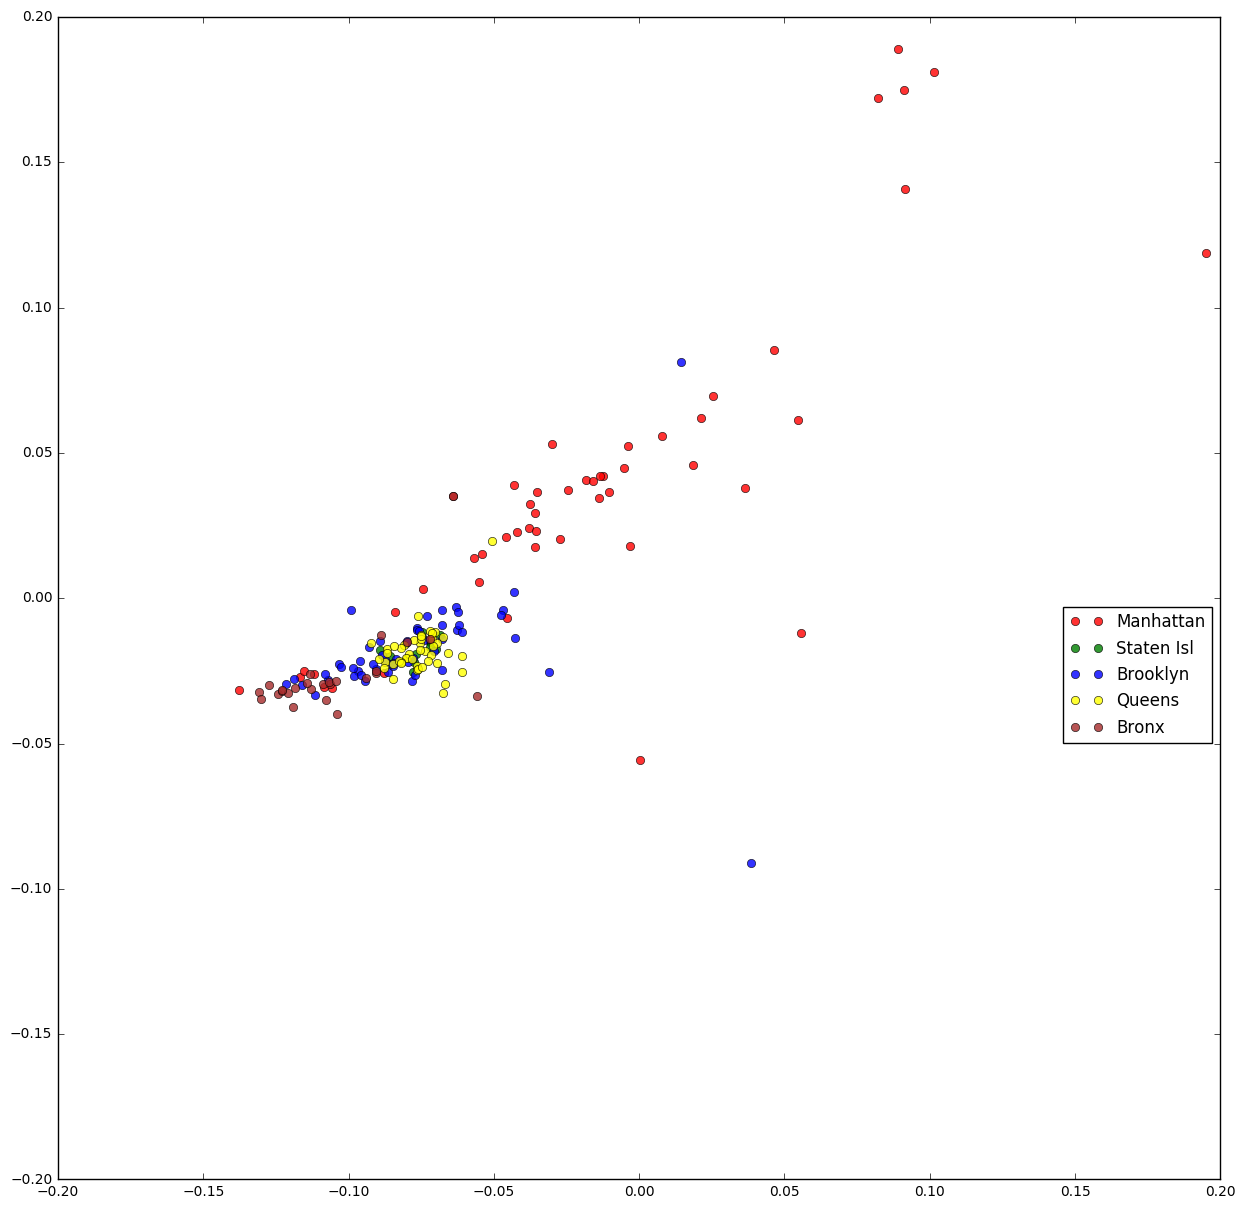

In [41]:
# Visualize zip codes by the 2/3 leading principle components of 311 patterns

colors=('gray','red','green','blue','yellow','brown')
#3-d plot    
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for d in range(1,6):
    ax.scatter(np.array(Xproj[D==d,0]), np.array(Xproj[D==d,1]), np.array(Xproj[D==d,2]),
        'o', color=colors[d], alpha=0.8)
plt.legend(['Manhattan','Staten Isl','Brooklyn','Queens','Bronx'],bbox_to_anchor=(1, 0.5))
#2-d plot
fig = plt.figure(figsize=(15,15))
for d in range(1,6):
    plt.plot(np.array(Xproj[D==d,0]), np.array(Xproj[D==d,1]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.xlim((-0.2,0.2))   
plt.ylim((-0.2,0.2)) 
plt.legend(['Manhattan','Staten Isl','Brooklyn','Queens','Bronx'],bbox_to_anchor=(1, 0.5))

In [42]:
list_311=list(data4.loc[:,"Adopt A Basket":"X Ray Machine Equipment"].columns)
data5=data4[["sale_price","gross_sq_feet","land_sq_feet","year_built","mean"]+list_311]

# Now add all 311 to the house price regression

In [43]:
res=sm.OLS(data4.sale_price,sm.add_constant(data4.loc[:,["gross_sq_feet","land_sq_feet","year_built","mean"]+list_311]),missing="drop").fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     136.4
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:00:09   Log-Likelihood:                -34358.
No. Observations:                2375   AIC:                         6.899e+04
Df Residuals:                    2236   BIC:                         6.980e+04
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------

### Over-fitting problem 

In [44]:
#Step one: Split the data to training and testing data: Using "train_test_split", and set random_state=324 and test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(data5.loc[:,"gross_sq_feet":],data5.sale_price,random_state=324,test_size=0.3)

#Step two: train the model again using training data.

res=sm.OLS(y_train,sm.add_constant(X_train),missing="drop").fit()
# print res.rsquared()
print("IS-R-squared:{}".format(res.rsquared))

res=LinearRegression(fit_intercept=False)
res.fit(X_train,y_train)
print("IS-R-squared:{}".format(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum()))                                                                   

#Step three: Get the out of sample prediction, and calculate Out of sample R-squared, and compare it to insample R-squared.
print("OS-R-squared:{}".format(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum()))

IS-R-squared:0.934803821248
IS-R-squared:0.934803821248
OS-R-squared:-0.384801491561


In [45]:
#Step four: try 100 times random split the data and get the average OS and IS R-squared
R_IS=[]
R_OS=[]
n=100
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data5.loc[:,"gross_sq_feet":],data5.sale_price,test_size=0.3)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 100 times is 0.908036951071
OS R-squared for 100 times is -0.130025944773


### Let's use PCA on 311 data to fix overfitting 

In [46]:
data6=data5.loc[:,"Adopt A Basket":]
data6.head()

,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,APPLIANCE,Asbestos,Beach Pool Sauna Complaint,BEST Site Safety,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,0.000000,0.027721,0.0,0.000000,0.000770,0.000257,0.001027,0.001797,0.001540,0.000000,...,0.000000,0.000000,0.000000,0.001797,0.001540,0.003850,0.002053,0.049281,0.0,0.0
1,0.000000,0.010675,0.0,0.000000,0.000227,0.000227,0.003861,0.000000,0.001363,0.000000,...,0.000227,0.000227,0.000000,0.010675,0.000454,0.001817,0.000227,0.050874,0.0,0.0
2,0.000000,0.002511,0.0,0.000000,0.001076,0.001973,0.000359,0.000000,0.000359,0.000000,...,0.000000,0.000000,0.004484,0.000000,0.000179,0.007354,0.001256,0.069058,0.0,0.0
3,0.000000,0.001476,0.0,0.000000,0.000170,0.006756,0.000738,0.000057,0.000227,0.000114,...,0.000170,0.000170,0.000908,0.000568,0.000170,0.000454,0.000341,0.012433,0.0,0.0
4,0.000049,0.001671,0.0,0.000049,0.000344,0.006143,0.000688,0.000000,0.000541,0.000049,...,0.000491,0.000197,0.005897,0.000590,0.000393,0.001622,0.000442,0.037445,0.0,0.0


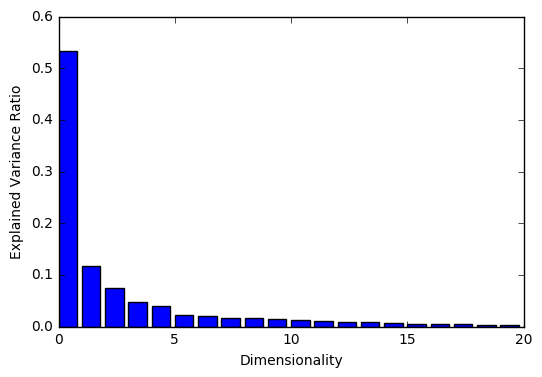

In [47]:
# Perform PCA, not restricting the number of components
n=159
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(data6)
eigenvalues = pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues)
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.xlim((0,20))
plt.show()

In [48]:
# Transform data6 to the top 6 eigenspace and merge the new data back to "gross_sq_feet" and "mean" and run the regression again.
X=pd.concat((data5[["gross_sq_feet","land_sq_feet","year_built","mean"]],pd.DataFrame(Xproj[:,:])),axis=1)
y=data5["sale_price"]

In [49]:
res1=sm.OLS(y,sm.add_constant(X),missing="drop").fit()
print res1.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     136.4
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        00:00:13   Log-Likelihood:                -34358.
No. Observations:                2375   AIC:                         6.899e+04
Df Residuals:                    2236   BIC:                         6.980e+04
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          2.987e+06   1.49e+06      2.007

In [50]:
Xproj[:,np.array(res1.pvalues[5:])<0.05].shape

(2375, 137)

In [51]:
X=pd.concat((data5[["gross_sq_feet","land_sq_feet","year_built","mean"]],pd.DataFrame(Xproj[:,np.array(res1.pvalues[5:])<0.05])),axis=1)
y=data5["sale_price"]

In [52]:
R_IS=[]
R_OS=[]
n=100
from sklearn.cross_validation import train_test_split
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
    res=LinearRegression(fit_intercept=False)
    res.fit(X_train,y_train)
    R_IS.append(1-((np.asarray(res.predict(X_train))-y_train)**2).sum()/((y_train-np.mean(y_train))**2).sum())                                                                     
    R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared for {} times is {}".format(n,np.mean(R_IS)))
print("OS R-squared for {} times is {}".format(n,np.mean(R_OS)))

IS R-squared for 100 times is 0.908091225761
OS R-squared for 100 times is 0.698809513907


## Adjust the feature selection above. 
### Q1. Experiment with the p-value threshold and choose the one optimizing the validation R2
### Q2. Implement backward/forward step-wise feature selection using validation R2 and report the R2 over a separate test set
### Q3. Implement cross-validation in Q2 (multiple random choices of training, validation and test samples)